# Project 1

    We begin by loading the data

In [139]:
%matplotlib inline 
import numpy as np   # generic stuff
import matplotlib.pyplot as plt

#### REMOVE THIS LINE BEFORE SUBMISSION
import pandas as pd
#######################################################################

from lib.proj1_helpers import * #the helper provided for the project
from lib.costs import *

# choose which implementations you would like
from lib.implementations import *
#from implementations import * #our implementations of the functions done by us


import datetime
from helpers import * #helpers of exo 2
# Useful starting lines

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [230]:
DATA_FOLDER = 'data/'

y_train, tx_train, ids_train = load_csv_data(DATA_FOLDER+'train.csv',sub_sample=False)

y_test, tx_test, ids_test = load_csv_data(DATA_FOLDER+'test.csv',sub_sample=False)

note that here we are only considering a sub_sample as the "True" value indicates

In [231]:
y_train

array([ 1., -1., -1., ...,  1., -1., -1.])

In [232]:
ids_train

array([100000, 100001, 100002, ..., 349997, 349998, 349999])

In [233]:
# illegal: 
pd.DataFrame(tx_train).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2.0,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,-1.916,164.546,1.0,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,-2.186,260.414,1.0,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,0.060,86.062,0.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,-0.871,53.131,0.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


### Parameters

In [234]:
def clean_missing_values(tx):
    nan_values = (tx==-999)*1
    for col in range(tx.shape[1]):
        column = tx[:,col][tx[:,col]!=-999]
        median = np.median(column)
        tx[:,col][tx[:,col]==-999] = median
    return tx, nan_values

In [235]:


tx_train, nan_values_train = clean_missing_values(tx_train)
tx_test, nan_values_test = clean_missing_values(tx_test)



In [236]:
tx_train = standardize(tx_train)
tx_train = tx_train[0]
tx_test = standardize(tx_test)
tx_test = tx_test[0]

In [237]:
def add_ones(tx):
    return np.concatenate((tx, np.ones([tx.shape[0],1])), axis=1)

In [238]:
tx_train = add_ones(tx_train)
tx_test = add_ones(tx_test)


(250000, 31)

In [243]:
tx_train.shape

(250000, 31)

In [239]:
initial_w = np.zeros(tx_train.shape[1])
initial_w

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.])

In [240]:
gamma = 0.05
max_iters = 1000
lambda_ = 0.5

# Methods

## *LEAST-SQUARES

In [194]:
def func_least_squares (y, tx, test_set, fct='mse'):
    name = 'least_squares'
    w,loss = least_squares(y,tx,fct)
    y_pred = predict_labels(w, test_set)
    create_csv_submission(ids_test, y_pred, name)
    
    plt.plot(w, 'go')
    plt.title('least squares weights for loss:  '+str(loss),fontsize=15, fontweight='bold');
    plt.show()
    
    return w, loss

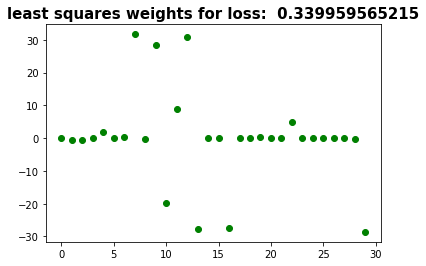

In [195]:
w, loss = func_least_squares (y=y_train, tx=tx_train, test_set=tx_test, fct='mse');


## *Gradient descent     -------------------------------------------------------------------------------

In [255]:
def func_GD (y, tx, test_set, max_iters, gamma, initial_w):
    name = 'Gradient_descent'
    w,loss = least_squares_GD(y, tx, initial_w, max_iters, gamma,fct='mse');
    y_pred = predict_labels(w, test_set)
    create_csv_submission(ids_test, y_pred, name)
    
    plt.plot(w, 'go')
    plt.title('GD: weights with loss:  '+str(loss),fontsize=15, fontweight='bold');
    plt.show()
    
    return w, loss

Gradient Descent(0/499): loss=0.5000000000000249, w0=-0.012945172731498287, w1=-0.007707255240772587
Gradient Descent(1/499): loss=0.47297380377022674, w0=-0.01761314829293544, w1=-0.014922424031245735
Gradient Descent(2/499): loss=0.4612197207645217, w0=-0.022517040342354876, w1=-0.021924792056576055
Gradient Descent(3/499): loss=0.45223198726807673, w0=-0.026417875008247223, w1=-0.028697998902000227
Gradient Descent(4/499): loss=0.4451260309739292, w0=-0.029642122726539273, w1=-0.03527035861367672
Gradient Descent(5/499): loss=0.4394570947414904, w0=-0.03224596842833226, w1=-0.04165996488014815
Gradient Descent(6/499): loss=0.43489248891755516, w0=-0.03431555683614382, w1=-0.047883944996655325
Gradient Descent(7/499): loss=0.4311784787941555, w0=-0.03592003816597766, w1=-0.053957258252926736
Gradient Descent(8/499): loss=0.4281210723895494, w0=-0.037120762146869005, w1=-0.05989315932493515
Gradient Descent(9/499): loss=0.42557171189027043, w0=-0.03797114397212468, w1=-0.0657033614342

Gradient Descent(87/499): loss=0.3818834483139468, w0=0.026202666201593304, w1=-0.36915918499592465
Gradient Descent(88/499): loss=0.3816477944447275, w0=0.02677966215506151, w1=-0.37188601972922625
Gradient Descent(89/499): loss=0.3814158647131001, w0=0.027349194805140704, w1=-0.3745905775400666
Gradient Descent(90/499): loss=0.38118759431258803, w0=0.02791138455419367, w1=-0.3772730443138427
Gradient Descent(91/499): loss=0.3809629196350407, w0=0.028466349671458644, w1=-0.37993360450104013
Gradient Descent(92/499): loss=0.38074177824634386, w0=0.029014206320222214, w1=-0.3825724411288425
Gradient Descent(93/499): loss=0.38052410886270227, w0=0.02955506858648004, w1=-0.38518973581222155
Gradient Descent(94/499): loss=0.3803098513274864, w0=0.030089048508799933, w1=-0.3877856687645752
Gradient Descent(95/499): loss=0.3800989465886178, w0=0.0306162561091388, w1=-0.3903604188079731
Gradient Descent(96/499): loss=0.37989133667648556, w0=0.03113679942439753, w1=-0.392914163383061
Gradient 

Gradient Descent(173/499): loss=0.37049911823849463, w0=0.05736472447753383, w1=-0.5385332301055237
Gradient Descent(174/499): loss=0.37043235310429834, w0=0.057582466305958056, w1=-0.5398953903719897
Gradient Descent(175/499): loss=0.3703664602740133, w0=0.05779809065396151, w1=-0.5412468843703128
Gradient Descent(176/499): loss=0.3703014257187388, w0=0.05801162500213086, w1=-0.542587804376621
Gradient Descent(177/499): loss=0.37023723564946637, w0=0.05822309641104747, w1=-0.5439182418857097
Gradient Descent(178/499): loss=0.3701738765128568, w0=0.058432531528857246, w1=-0.5452382876171692
Gradient Descent(179/499): loss=0.3701113349870989, w0=0.05863995659868658, w1=-0.5465480315214769
Gradient Descent(180/499): loss=0.3700495979778368, w0=0.05884539746590768, w1=-0.547847562786052
Gradient Descent(181/499): loss=0.3699886526141758, w0=0.05904887958525661, w1=-0.549136969841273
Gradient Descent(182/499): loss=0.36992848624476, w0=0.05925042802780721, w1=-0.5504163403664593
Gradient D

Gradient Descent(257/499): loss=0.3669531408097064, w0=0.07026508891737966, w1=-0.623231212535214
Gradient Descent(258/499): loss=0.36692733997082033, w0=0.07037167474965184, w1=-0.6239553276337194
Gradient Descent(259/499): loss=0.3669017794823572, w0=0.07047749061646535, w1=-0.6246743176837575
Gradient Descent(260/499): loss=0.36687645594282725, w0=0.07058254512331195, w1=-0.6253882272632592
Gradient Descent(261/499): loss=0.3668513660061411, w0=0.07068684676891772, w1=-0.6260971005607903
Gradient Descent(262/499): loss=0.3668265063806625, w0=0.07079040394676878, w1=-0.6268009813788751
Gradient Descent(263/499): loss=0.3668018738282822, w0=0.07089322494661097, w1=-0.6274999131372933
Gradient Descent(264/499): loss=0.36677746516350546, w0=0.07099531795592381, w1=-0.6281939388763498
Gradient Descent(265/499): loss=0.3667532772525562, w0=0.07109669106136932, w1=-0.628883101260119
Gradient Descent(266/499): loss=0.3667293070124956, w0=0.07119735225021626, w1=-0.6295674425796622
Gradient 

Gradient Descent(341/499): loss=0.3653829175501657, w0=0.07718657261060924, w1=-0.6697797564981334
Gradient Descent(342/499): loss=0.3653693139739794, w0=0.0772506128316987, w1=-0.6701973226664413
Gradient Descent(343/499): loss=0.36535579263875756, w0=0.07731434107063916, w1=-0.67061242134274
Gradient Descent(344/499): loss=0.36534235263829257, w0=0.07737776052748563, w1=-0.6710250737617496
Gradient Descent(345/499): loss=0.3653289930797648, w0=0.07744087436625698, w1=-0.6714353009706211
Gradient Descent(346/499): loss=0.3653157130835216, w0=0.07750368571535678, w1=-0.6718431238305765
Gradient Descent(347/499): loss=0.36530251178286344, w0=0.07756619766798853, w1=-0.6722485630185349
Gradient Descent(348/499): loss=0.36528938832382907, w0=0.07762841328256535, w1=-0.6726516390287237
Gradient Descent(349/499): loss=0.36527634186498925, w0=0.07769033558311426, w1=-0.6730523721742777
Gradient Descent(350/499): loss=0.36526337157723976, w0=0.07775196755967512, w1=-0.6734507825888226
Gradien

Gradient Descent(424/499): loss=0.3644698287786097, w0=0.08167845725914077, w1=-0.6976900093568653
Gradient Descent(425/499): loss=0.36446088197082105, w0=0.08172482029568323, w1=-0.6979604465793423
Gradient Descent(426/499): loss=0.3644519729150561, w0=0.08177104477879578, w1=-0.6982296683611685
Gradient Descent(427/499): loss=0.3644431013201209, w0=0.08181713196130506, w1=-0.6984976848457283
Gradient Descent(428/499): loss=0.36443426689837155, w0=0.0818630830818008, w1=-0.6987645060862472
Gradient Descent(429/499): loss=0.36442546936566095, w0=0.08190889936478955, w1=-0.6990301420465878
Gradient Descent(430/499): loss=0.36441670844128604, w0=0.08195458202084685, w1=-0.6992946026020377
Gradient Descent(431/499): loss=0.36440798384793466, w0=0.08200013224676761, w1=-0.6995578975400919
Gradient Descent(432/499): loss=0.3643992953116352, w0=0.08204555122571491, w1=-0.6998200365612272
Gradient Descent(433/499): loss=0.36439064256170683, w0=0.08209084012736712, w1=-0.7000810292796699
Gradi

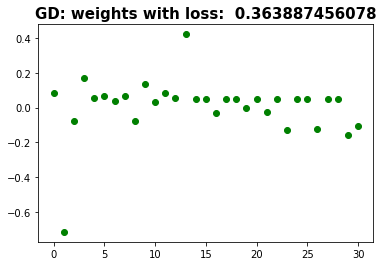

In [256]:
w, loss = func_GD (y=y_train, tx=tx_train, test_set=tx_test, max_iters=500,gamma=0.05, initial_w=initial_w);


In [246]:
w.shape
tx_train.shape

(250000, 31)

In [257]:
    y_pred_train = predict_labels(w, tx_train)
    right_train = np.sum(y_pred_train == y_train)/len(y_train)*100
    right_train

72.547600000000003

## *Ridge regression    -------------------------------------------------------------------------------

In [146]:
def func_ridge_regression (y, tx, test_set, lambda_):
    name = 'Ridge_regression'
    
    w,loss = ridge_regression(y, tx, lambda_=lambda_, fct='mse');
    
    y_pred = predict_labels(w, test_set)
    create_csv_submission(ids_test, y_pred, name)
    
    plt.plot(w, 'go')
    plt.title('Ridge regression: weights ;loss:  '+str(loss),fontsize=15, fontweight='bold');
    plt.show()
    
    return w, loss

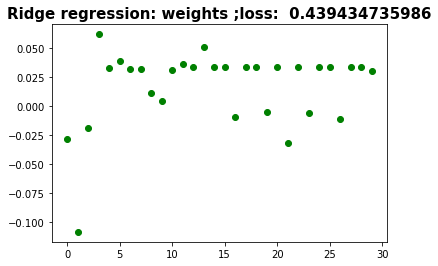

In [198]:
func_ridge_regression (y=y_train, tx=tx_train, test_set=tx_test, lambda_=lambda_);

## * SGD -------------------------------------------------------------------------------------------------

In [129]:
def func_SGD (y, tx, test_set, max_iters, gamma, initial_w, batch_size):
    name = 'Stochastic_Gradient_descent'
    
    w,loss = least_squares_SGD(y, tx, initial_w, max_iters,\
                               gamma, batch_size)
    
    y_pred = predict_labels(w, test_set)
    create_csv_submission(ids_test, y_pred, name)
    
    plt.plot(w, 'go')
    plt.title('SGD: weights with loss:  '+str(loss),fontsize=15, fontweight='bold');
    plt.show()
    
    return w, loss

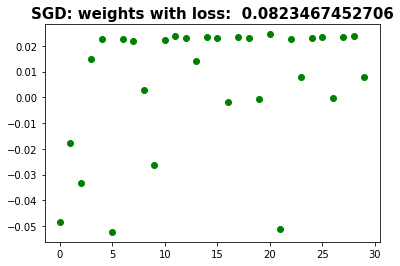

In [199]:
w, loss = func_SGD (y=y_train, tx=tx_train, test_set=tx_test, max_iters=10,gamma=gamma, initial_w=initial_w,\
                   batch_size=5);

## *LOGISTIC

In [289]:
def func_logistic (y, tx, test_set, max_iters, gamma, initial_w):
    name = 'Logistic regression'
    
    w,loss = logistic_regression(y, tx, initial_w, max_iters, gamma)
    #w,loss = logistic_regression_mat (y, tx, initial_w, max_iters, gamma)
    
    y_pred = predict_labels(w, test_set)
    create_csv_submission(ids_test, y_pred, name)
    
    plt.plot(w, 'go')
    plt.title('logistic reg: weights with loss:  '+str(loss),fontsize=15, fontweight='bold');
    plt.show()
    
    return w, loss

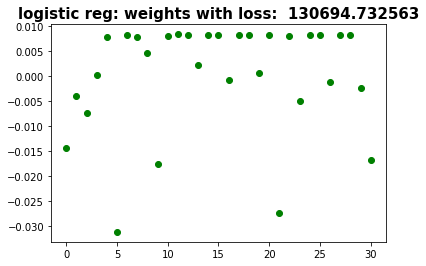

In [295]:
w, loss = func_logistic (y=y_train, tx=tx_train, test_set=tx_test, max_iters=10,\
                         gamma=0.000000001, initial_w=w);

In [293]:
y_pred_train = predict_labels(w, tx_train)
right_train = np.sum(y_pred_train == y_train)/len(y_train)*100
right_train

65.733199999999997